# OpenSea Asset Events by selected NFT

Preliminary dataset exploration

## Helper functions

In [1]:
import os
import re
import pandas as pd


def read_combine(io):
    """
    Read a list of Excel files and combine them into a panadas DataFrame
    
    Args:
        io (list): list of fully qualified filenames
        
    Returns:
        DataFrame
    """
    list_df = []
    for each in io:
        # print("...reading", os.path.basename(each)) 
        df = pd.read_excel(each)
        df["filename"] = os.path.basename(each)
        list_df.append(df)
    
    return pd.concat(list_df)


def get_abspath(path, pattern):
    """
    Search directory non-recursively for filename by name patterns
    
    Parameters
    ----------
    path : 
    patthern : 

    Returns
    -------
    a list of absolute path, use os.path.basename to get the filename
    """
    return [os.path.join(path, x) for x in os.listdir(path) if re.search(pattern, x)]


def print_filesize(abspath):
    df=pd.DataFrame({'filename': [os.path.basename(x) for x in abspath],
                     'size': [os.stat(x).st_size for x in abspath]}) \
        .set_index('filename')
    print(df)
    print("total size:", round(sum(df["size"]) / 1024**3, 2), "gb")

data_dir = os.path.join(os.getcwd(), 'data')

## Read data

In [2]:
nft20_successful_event_fn = os.path.join(data_dir, 'NFT20_successful_events_new_有winneraddress.feather')
print_filesize([nft20_successful_event_fn])
nft20 = pd.read_feather(nft20_successful_event_fn)

                                                        size
filename                                                    
NFT20_successful_events_new_有winneraddress.feather  74121970
total size: 0.07 gb


In [3]:
nft20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408943 entries, 0 to 408942
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   event_timestamp                   408943 non-null  datetime64[ns]
 1   event_type                        408943 non-null  object        
 2   token_id                          408590 non-null  float64       
 3   num_sales                         408590 non-null  float64       
 4   listing_time                      376848 non-null  datetime64[ns]
 5   token_owner_address               408590 non-null  object        
 6   token_seller_address              408943 non-null  object        
 7   from_account_address              205 non-null     object        
 8   deal_price                        408943 non-null  float64       
 9   payment_token_symbol              408806 non-null  object        
 10  payment_token_decimals          

In [16]:
nft20.rename(columns={'wallet_address_input': 'asset_contract_address'}, inplace=True)

In [17]:
nft20.loc[:, ['asset_contract_address', 'winner_account_address', 'token_seller_address', 'token_owner_address']]

,asset_contract_address,winner_account_address,token_seller_address,token_owner_address
0,0xd2F668a8461D6761115dAF8Aeb3cDf5F40C532C6,0x24907c58e080f2a9d1f31f25d555aa3d5a5e3419,0x839271ef8feba0466cea5cfae4daa991c3435e91,0x24907c58e080f2a9d1f31f25d555aa3d5a5e3419
1,0xd2F668a8461D6761115dAF8Aeb3cDf5F40C532C6,0xf0e60ce560a7d7226369940e168bf00abd675467,0xef9c82a23667be3c545a6a574f852062e178d637,0xf0e60ce560a7d7226369940e168bf00abd675467
2,0xd2F668a8461D6761115dAF8Aeb3cDf5F40C532C6,0x87cfdc4bfae569088bc1bcc0dd3c19f53da54193,0x0944f42caa5e846943c0641d1a47ed7b81fc5325,0x87cfdc4bfae569088bc1bcc0dd3c19f53da54193
3,0xd2F668a8461D6761115dAF8Aeb3cDf5F40C532C6,0x87cfdc4bfae569088bc1bcc0dd3c19f53da54193,0x1d070fc32fcde0f1fbf469ec4a16995883f83f9d,0x87cfdc4bfae569088bc1bcc0dd3c19f53da54193
4,0xd2F668a8461D6761115dAF8Aeb3cDf5F40C532C6,0x00167777e0daf9dc2d3a76195ab56e857ec67ab2,0xf7e78d106a6e3dd2d7f6f39b6ba08a307bcf952e,0x00167777e0daf9dc2d3a76195ab56e857ec67ab2
...,...,...,...,...
408938,0x7EA3Cca10668B8346aeC0bf1844A49e995527c8B,0x78cd808d24157fe7e5cdf57c4c9776fd7b952b77,0x5ee42438d0d8fc399c94ef3543665e993e847b49,0xa17d53d78a2bbe050b8ebb00ceddb1d3d7bf7b32
408939,0x7EA3Cca10668B8346aeC0bf1844A49e995527c8B,0x8fe0a02a3d7fee8af60518f771fd8d71a6dd8e92,0x10e719c7f2024021add3323e3f3df56d8376709c,0xe6f45376f64e1f568bd1404c155e5ffd2f80f7ad
408940,0x7EA3Cca10668B8346aeC0bf1844A49e995527c8B,0x0846931641992a70d393771b5d9a1ab8ad5b2f28,0x10e719c7f2024021add3323e3f3df56d8376709c,0x1e815a8188f1b84564577c1c998f7e6b4706b752
408941,0x7EA3Cca10668B8346aeC0bf1844A49e995527c8B,0x0acdf1496b9f50811f9dc57f386602e988e26e8c,0x10e719c7f2024021add3323e3f3df56d8376709c,0x4fc9e9094330ba64bdb4f8295e33809e63b5940a


In [19]:
nft20.loc[:, ['asset_contract_address', 'collection_slug']].drop_duplicates()

,asset_contract_address,collection_slug
0,0xd2F668a8461D6761115dAF8Aeb3cDf5F40C532C6,karafuru
11993,0x59468516a8259058baD1cA5F8f4BFF190d30E066,invisiblefriends
17273,0x79FCDEF22feeD20eDDacbB2587640e45491b757f,mfers
42480,0x67D9417C9C3c250f61A83C7e8658daC487B56B09,phantabear
60717,0xba30E5F9Bb24caa003E9f2f0497Ad287FDF95623,bored-ape-kennel-club
82272,0x4Db1f25D3d98600140dfc18dEb7515Be5Bd293Af,hapeprime
93030,0xe785E82358879F061BC3dcAC6f0444462D4b5330,world-of-women-nft
116950,0x1CB1A5e65610AEFF2551A50f76a87a7d3fB649C6,cryptoadz-by-gremplin
138078,0x9A534628B4062E123cE7Ee2222ec20B86e16Ca8F,mekaverse
152152,0x86C10D10ECa1Fca9DAF87a279ABCcabe0063F247,coolpetsnft


In [81]:
pd.concat([nft20.winner_account_address, nft20.token_seller_address]).value_counts()

0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459    2645
0x2af4b707e1dce8fc345f38cfeeaa2421e54976d5     849
0x721931508df2764fd4f70c53da646cb8aed16ace     814
0x8279648470eb92cbcd00ceb8ca30c2adfac20740     759
0x54b174179ae825ed630da40b625bb3c883cd40ae     680
                                              ... 
0x3e02a9b5e18692ade70685e25a4a92ebdb2dae64       1
0x2cbdf7f187198d44fb5906f8544ba56f1700182e       1
0x7a84e9f43dbf2c98a251b161da9fbe9611e9c635       1
0xc981c808d5124293b6588739d799a3d1c46abce1       1
0x7abcd4133cdfef01d1fce4be7b7e1e81113a33d6       1
Length: 145936, dtype: int64

Above result shows the number of successful `buy` or `sell` events buy wallet addresses and the total number (length) of unique wallet addresses in this dataset.

Any data anomaly?

In [93]:
nft20[nft20.token_seller_address == nft20.winner_account_address]

,event_timestamp,event_type,token_id,num_sales,listing_time,token_owner_address,token_seller_address,from_account_address,deal_price,payment_token_symbol,...,created_date,custom_event_name,dev_fee_payment_event,dev_seller_fee_basis_points,transaction_from_account_address,transaction_to_account_address,winner_account_address,collection_slug,contract_address,asset_contract_address
156572,2022-04-15 18:20:28,successful,14091.0,4.0,2022-04-15 18:15:51,0x3f5c2be8b6e799fd388d9d1da2b87e4da62f505a,0x0966d26521c18e82d11c40d64d3d1853ced5e707,None,1.090000e+18,ETH,...,2022-04-15T18:20:41.439404,NaN,"{'asset': None, 'asset_bundle': None, 'event_t...",500.0,0x0966d26521c18e82d11c40d64d3d1853ced5e707,0x0000000035634b55f3d99b071b5a354f48e10bef,0x0966d26521c18e82d11c40d64d3d1853ced5e707,coolpetsnft,0x7f268357a8c2552623316e2562d90e642bb538e5,0x86C10D10ECa1Fca9DAF87a279ABCcabe0063F247


## _Melt_ dataset from the wallet point-of-view aka user_account_addresses

In [41]:
buy = nft20.set_index('winner_account_address').rename_axis('user_account_address')
buy['event_type'] = 'buy'
sell = nft20.set_index('token_seller_address').rename_axis('user_account_address')
sell['event_type'] = 'sell'

In [56]:
df = pd.concat([buy, sell])
df.groupby('user_account_address')['event_type'].size().sort_values().quantile([q/20 for q in range(0,20)])

0.00     1.0
0.05     1.0
0.10     1.0
0.15     1.0
0.20     1.0
0.25     1.0
0.30     1.0
0.35     1.0
0.40     2.0
0.45     2.0
0.50     2.0
0.55     2.0
0.60     3.0
0.65     3.0
0.70     4.0
0.75     5.0
0.80     6.0
0.85     8.0
0.90    12.0
0.95    20.0
Name: event_type, dtype: float64

## Data distribution

<AxesSubplot:>

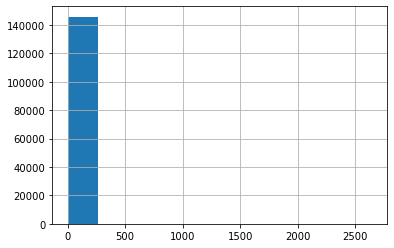

In [58]:
df.groupby('user_account_address')['event_type'].size().hist()

<AxesSubplot:xlabel='event_timestamp'>

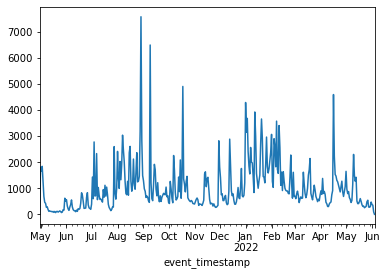

In [64]:
nft20.groupby(pd.Grouper(key='event_timestamp', freq="D")).size().plot(kind='line')

In [92]:
nft20.groupby('collection_slug')['event_timestamp'].agg([min, max]).assign(delta=lambda x: (x['max'] - x['min']).round('D')).sort_values('delta')

,min,max,delta
collection_slug,,,
proof-moonbirds,2022-04-16 15:06:47,2022-06-02 16:22:29,47 days
invisiblefriends,2022-02-23 22:02:10,2022-06-02 23:13:14,99 days
karafuru,2022-02-04 14:01:20,2022-06-03 06:39:28,119 days
coolpetsnft,2022-01-31 23:11:31,2022-06-03 07:08:56,122 days
hapeprime,2022-01-19 17:59:32,2022-06-03 05:42:00,134 days
azuki,2022-01-12 18:04:15,2022-06-02 17:14:33,141 days
phantabear,2022-01-01 03:03:54,2022-06-03 06:22:58,153 days
clonex,2021-12-12 19:43:29,2022-06-02 18:20:13,172 days
mfers,2021-11-30 21:27:04,2022-06-03 05:34:46,184 days


In [98]:
df.reset_index().groupby('collection_slug')['user_account_address'].nunique().sort_values()

collection_slug
invisiblefriends          6174
kaiju-kingz               8132
proof-moonbirds           9064
karafuru                 10072
cyberkongz-vx            10101
hapeprime                10224
mekaverse                10760
cryptoadz-by-gremplin    10776
phantabear               11583
world-of-women-nft       11717
meebits                  11922
clonex                   12069
bored-ape-kennel-club    12521
boredapeyachtclub        12806
cool-cats-nft            13281
lazy-lions               13361
mfers                    13850
doodles-official         14466
coolpetsnft              14954
azuki                    15484
mutant-ape-yacht-club    24143
Name: user_account_address, dtype: int64

Above shows the number of wallets by NFT collection